In [10]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
import matplotlib.pyplot as pp
#from mlxtend.plotting import plot_decision_regions

cols = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]

mmg = pd.read_csv("mammographic_masses.data.txt", na_values=["?"], names = cols)

data = np.array(mmg.to_records())
#print (data)


In [11]:

#data_n = list(np.where(data=='?')[0])
mmg.describe()

mmg.dropna(inplace=True)
#print mmg

In [12]:


y = mmg["Severity"].values
X = mmg[["BI-RADS", "Age", "Shape", "Margin", "Density"]].values

Z = mmg[["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]].values

#Z = preprocessing.StandardScaler().fit_transform(Z)

X = preprocessing.StandardScaler().fit_transform(X)

print X

[[ 0.3211177   0.7650629   0.17563638  1.39618483  0.24046607]
 [ 0.3211177   0.15127063  0.98104077  1.39618483  0.24046607]
 [-0.20875843 -1.89470363 -1.43517241 -1.157718    0.24046607]
 ..., 
 [-0.20875843  0.56046548  0.98104077  1.39618483  0.24046607]
 [ 0.3211177   0.69686376  0.98104077  1.39618483  0.24046607]
 [-0.20875843  0.42406719  0.17563638  0.11923341  0.24046607]]


In [13]:
#SVM

n, d = X.shape
y_predsvm = np.zeros((n, 1))
y_temp = y.reshape(-1, 1)
for i in range(n):
    all_b_i = range(0, i) + range(i+1, n)
    X_t = X[all_b_i]
    y_t = y_temp[all_b_i]
    svc = svm.SVC(kernel='linear', C = 1.0)
    #y_t = y_t.reshape(-1, 1)
    svc.fit(X_t, y_t)
    y_predsvm[i] = svc.predict(X[i])
errsvm = np.mean(y!=y_pred)
print "!!!!!!!!!!!!!!!!!!"
print errsvm
    

/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resh

!!!!!!!!!!!!!!!!!!
0.497073595587


/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resh

In [14]:
print ("err1(w LVOCV) : %f | " % (err))

err1(w LVOCV) : 0.497074 | 


In [14]:
# KNN
from sklearn.model_selection import cross_val_score
y_predknn = np.zeros((n, 1))
for i in range(n):
    all_b_i = range(0, i) + range(i+1, n)
    X_t = X[all_b_i]
    y_t = y[all_b_i]
    c = neighbors.KNeighborsClassifier(n_neighbors=8)
    c.fit(X_t, y_t)
    y_predknn[i] = c.predict(X[i])  
knnerr = np.mean(y!=y_predknn)
cv2 = cross_val_score(c, X, y, cv=10)

cv2.mean()



0.7950320445545247

Maybe I am not quite sure what the correct value of K is so I will check the first 25

In [15]:
for i in range(25):
    y_predknnm = np.zeros((n,1))
    for j in range(n):
        all_b_i = range(0, j) + range(j+1, n)
        X_t = X[all_b_i]
        y_t = y[all_b_i]
        c2 = neighbors.KNeighborsClassifier(n_neighbors=i+1)
        c2.fit(X_t, y_t)
        y_predknnm[j] = c2.pred(X[j])
    print ("%d: %f" % (i, np.mean(y!=y_predknnm)))
    
    cv3 = cross_val_score(c2, X, y, cv=5)
    

0: 0.735948
1: 0.726259
2: 0.773451
3: 0.781820
4: 0.792772
5: 0.805961
6: 0.801134
7: 0.803558
8: 0.803536
9: 0.801134
10: 0.801155
11: 0.801119
12: 0.802324
13: 0.807107
14: 0.801134
15: 0.801083
16: 0.797468
17: 0.801105
18: 0.798702
19: 0.795066
20: 0.795088
21: 0.793861
22: 0.797468
23: 0.795066
24: 0.797475


In [16]:
#RF

print X.shape
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.tree import export_graphviz

import pydot
tree = 0
zz = 0
y_predrf = np.zeros((n, 1))
for i in range(n):
    all_b_i = range(0,i) + range(i+1, n)
    y_t2 = y[all_b_i]
    X_t2 = X[all_b_i]
    rf = 0
    if (i == 4):
        rf = rfc(n_estimators=20, max_depth=3, random_state=355)
    else:
        rf = rfc(n_estimators=20, random_state=355)
        if (i == 3):
            zz = rf
    rf.fit(X_t, y_t)
    
    y_predrf[i] = rf.predict(X[i])
    if (i == 2):
        tree = rf.estimators_[5]
        export_graphviz(tree, out_file = 'small_tree.dot', feature_names = cols, rounded = True)
        #(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
        #graph.write_png('small_tree.png');
    if (i == 4):
        tree = rf.estimators_[5]
        export_graphviz(tree, out_file = 'lit_tree.dot', feature_names = cols, rounded = True)
errrf = np.mean(y!=y_predrf)    


    

(830, 5)


/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationW

after writing to a dot file one can execute
dot -Tpng small_tree.dot -o small_tree.png 
to write the random forest decisions to a png file



![title](small_tree.png)

The random forest is too hard to read due to the depth here is too high because max_depth=None so we change max_depth attribute to 3

![title](lit_tree.png)

In [17]:
#We will now look at which features are the most important in determining severity

from sklearn.feature_selection import RFE

n, d = X.shape
y_pred = np.zeros((n, 1))
y_temp = y.reshape(-1, 1)
ranking = list()
for i in range(n):
    all_b_i = range(0, i) + range(i+1, n)
    X_t = X[all_b_i]
    y_t = y_temp[all_b_i]
    svc = svm.SVC(kernel='linear', C = 1.0)
    fs = RFE(svc, 3, step=1)
    #y_t = y_t.reshape(-1, 1)
    fs.fit(X_t, y_t)
    #if (i == 2):
        #plot_decision_regions(X=X_t, y=y_t.flatten(), clf=fs, legend=2)
    y_pred[i] = fs.predict(X[i])
    ranking.append(fs.ranking_)
#err = np.mean(y!=y_pred)
#print "!!!!!!!!!!!!!!!!!!"
#print err

/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resh

In [18]:
#print feature selection
i = 1
for w in ranking:
    print (i, w)
    i = i+1

(1, array([1, 1, 2, 1, 3]))
(2, array([1, 1, 2, 1, 3]))
(3, array([1, 1, 2, 1, 3]))
(4, array([1, 2, 1, 1, 3]))
(5, array([1, 2, 1, 1, 3]))
(6, array([1, 1, 2, 1, 3]))
(7, array([1, 1, 2, 1, 3]))
(8, array([1, 1, 2, 1, 3]))
(9, array([1, 1, 2, 1, 3]))
(10, array([1, 1, 2, 1, 3]))
(11, array([1, 1, 2, 1, 3]))
(12, array([1, 1, 2, 1, 3]))
(13, array([1, 1, 2, 1, 3]))
(14, array([1, 1, 2, 1, 3]))
(15, array([1, 2, 1, 1, 3]))
(16, array([1, 1, 2, 1, 3]))
(17, array([1, 1, 2, 1, 3]))
(18, array([1, 1, 2, 1, 3]))
(19, array([1, 1, 2, 1, 3]))
(20, array([1, 1, 2, 1, 3]))
(21, array([1, 1, 2, 1, 3]))
(22, array([1, 1, 2, 1, 3]))
(23, array([1, 1, 2, 1, 3]))
(24, array([1, 1, 2, 1, 3]))
(25, array([1, 1, 2, 1, 3]))
(26, array([1, 1, 2, 1, 3]))
(27, array([1, 1, 2, 1, 3]))
(28, array([1, 1, 2, 1, 3]))
(29, array([1, 1, 2, 1, 3]))
(30, array([1, 1, 2, 1, 3]))
(31, array([1, 1, 2, 1, 3]))
(32, array([1, 1, 2, 1, 3]))
(33, array([1, 1, 2, 1, 3]))
(34, array([1, 1, 2, 1, 3]))
(35, array([1, 1, 2, 1,

Accoring to recursive feature estimate the 1st, 2nd, and 4th feature have the most importance.
Occasionally the 2nd feature will give the 3rd feature a higher precedence but 1st and 4th are always important features

Let's graph the data to have an idea of what we're looking at. Even though there are 5 dimensions, we will compare the 1st, 2nd, and 4th feature with each other

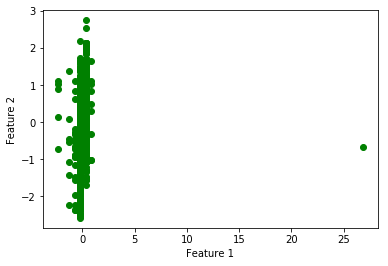

In [22]:
pp.figure()
pp.plot(X[:,0], X[:,1], 'go') # g for green, o for circle
pp.xlabel('Feature 1')
pp.ylabel('Feature 2')
pp.show()

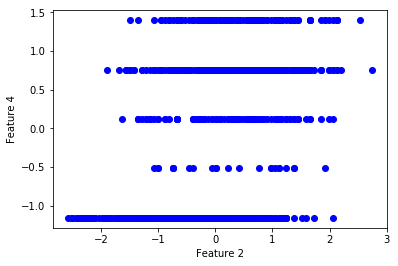

In [23]:
pp.figure()
pp.plot(X[:,1], X[:,3], 'bo') # b for blue, o for circle
pp.xlabel('Feature 2')
pp.ylabel('Feature 4')
pp.show()

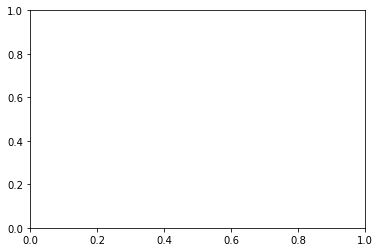

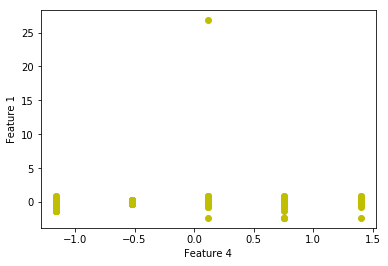

In [25]:
pp.figure()
pp.plot(X[:,3], X[:,0], 'yo') # y for yellow, o for circle
pp.xlabel('Feature 4')
pp.ylabel('Feature 1')
pp.show()

(830, 2)
(830,)
0
1
2


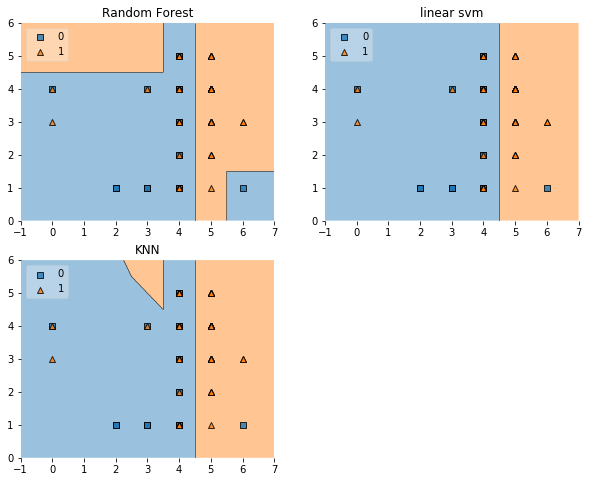

In [20]:

import matplotlib.gridspec as gridspec
import itertools
from mlxtend.classifier import EnsembleVoteClassifier

from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clF1 = rfc(n_estimators=20, random_state=355)
value = 1.5
width = 0.75
C = 0.2
clF2 = svm.SVC(kernel='linear', C=C, probability=True)
clF3 = neighbors.KNeighborsClassifier(n_neighbors=9)
eclf = EnsembleVoteClassifier(clfs=[clF1, clF2, clF3],
                              weights=[2, 1, 1], voting='soft')



X2 = mmg[["BI-RADS", "Margin"]].values
X_tra = X2[:600]
X_te = X2[600:]
y_tra = y[:600]
y_te = y[600:]
#print X2
#X2 = preprocessing.StandardScaler().fit_transform(X2)
#rf = rfr(n_estimators=20, random_state=355)
 #   rf.fit(X_t, y_t)
# Loading some example data
# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = pp.figure(figsize=(10, 8))

labels = ['Random Forest',
          'linear svm',
          'KNN']

i = 0
for clfx, lab, grd in zip([clF1, clF2, clF3],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clfx.fit(X_tra, y_tra)
    ax = pp.subplot(gs[grd[0], grd[1]])
    #fig = plot_decision_regions(X, y=y, filler_feature_values={2: value, 3: value, 4: value}, filler_feature_ranges={2: width, 3: width, 4: width}, clf=clfx, legend=2)
    fig = plot_decision_regions(X_te, y_te, clf=clfx, legend=2)
    pp.title(lab)
    i = i+1
pp.show()